# Mini Project Notebook- Week 3
## Starbuck Customer Data Analysis

Ruben Roberts, Grant Wagener


Presentation Link:
https://docs.google.com/presentation/d/1uzVJn8RThzYUhJZVsl3vDbhODJ_TPAVT_MKewk-KPpk/edit?usp=sharing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    from google.colab import drive
    drive.mount('/content/drive')
    thePath = '/content/drive/My Drive/Colab Notebooks/'
except:
    thePath = './'



Mounted at /content/drive


In [ ]:
# Data Clean and Preprocessing
# Import Dataset from https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ihormuliar/starbucks-customer-data")

# Read the three CSV files to data frames
df_portfolio = pd.read_csv(path + "/portfolio.csv")
df_profile = pd.read_csv(path + "/profile.csv")
df_transcript = pd.read_csv(path + "/transcript.csv")

100%|██████████| 7.38M/7.38M [00:00<00:00, 123MB/s]

Extracting files...


In [ ]:
print("Portfolio \n Head:")
print(df_portfolio.head(10))

print(df_portfolio.info())
print(df_portfolio.shape)
print(df_portfolio.describe())

# Portfolio has information on the offers -- there are only 10 offers

Portfolio 
 Head:
   Unnamed: 0  reward                              channels  difficulty  \
0           0      10         ['email', 'mobile', 'social']          10   
1           1      10  ['web', 'email', 'mobile', 'social']          10   
2           2       0            ['web', 'email', 'mobile']           0   
3           3       5            ['web', 'email', 'mobile']           5   
4           4       5                      ['web', 'email']          20   
5           5       3  ['web', 'email', 'mobile', 'social']           7   
6           6       2  ['web', 'email', 'mobile', 'social']          10   
7           7       0         ['email', 'mobile', 'social']           0   
8           8       5  ['web', 'email', 'mobile', 'social']           5   
9           9       2            ['web', 'email', 'mobile']          10   

   duration     offer_type                                id  
0         7           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1         5           bogo  4d

In [ ]:
# df_profile
print(df_profile.head(10))
print(df_profile.info())
print(df_profile.shape)
print(df_profile.describe())
print(len(df_profile['id'].unique())) #ids are unique

print(df_profile.groupby('age').count())


   Unnamed: 0 gender  age                                id  became_member_on  \
0           0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1           1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2           2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3           3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4           4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804   
5           5      M   68  e2127556f4f64592b11af22de27a7932          20180426   
6           6    NaN  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925   
7           7    NaN  118  68617ca6246f4fbc85e91a2a49552598          20171002   
8           8      M   65  389bc3fa690240e798340f5a15918d5c          20180209   
9           9    NaN  118  8974fc5686fe429db53ddde067b88302          20161122   

     income  
0       NaN  
1  112000.0  
2       NaN  
3  100000.0  
4       NaN  
5   70000.0  
6       Na

In [ ]:
df_transcript.head(5)
print(df_transcript.head(10))
print(df_transcript.tail(10))
print(df_transcript.info())
print(df_transcript.shape)
print(df_transcript.describe())
print(len(df_transcript['person'].unique())) #all ids in profile are represented
print(df_transcript['time'].unique()) # values increment by 6.. what does it represent?
print(df_transcript['event'].unique()) # transaction, offer received, offer viewed, offer completed
print(df_transcript.groupby('event').count()) # 138953, 76277, 57725, 33579



   Unnamed: 0                            person           event  \
0           0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1           1  a03223e636434f42ac4c3df47e8bac43  offer received   
2           2  e2127556f4f64592b11af22de27a7932  offer received   
3           3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4           4  68617ca6246f4fbc85e91a2a49552598  offer received   
5           5  389bc3fa690240e798340f5a15918d5c  offer received   
6           6  c4863c7985cf408faee930f111475da3  offer received   
7           7  2eeac8d8feae4a8cad5a6af0499a211d  offer received   
8           8  aa4862eba776480b8bb9c68455b8c2e1  offer received   
9           9  31dda685af34476cad5bc968bdb01c53  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdc

#Data Cleaning & Preprocessing

Data cleaning and preprocessing are crucial for ensuring the accuracy and reliability of our analysis. This step includes handling missing values, converting data types appropriately, and creating relevant features for further analysis.

First, any rows missing data in portfolio and transcript are dropped.
Then, missing gender data is replaced with 'Unknown', while missing income data is replaced with the median income.

Furthermore the observations where gender and income are unknown, the age is listed as 118. This is ~12% of the data so separate df 'df_profile_clean' is created to use when the accuracy of these features are important.

In [ ]:
# Unpack the event type column for easier manipulation
import ast
df_transcript['value'] = df_transcript['value'].apply(ast.literal_eval)
# df_transcript['vaule'] = df_transcript['value'].apply(pd.eval)
df_transcript_expanded = pd.json_normalize(df_transcript['value'])
df_transcript_expanded[df_transcript_expanded['reward'].notna()]
df_transcript_expanded['offer_id'] = df_transcript_expanded['offer_id'].fillna(df_transcript_expanded['offer id'])
df_transcript_expanded = df_transcript_expanded.drop(columns=['offer id'])
df_transcript = df_transcript.join(df_transcript_expanded)
print(df_transcript_expanded.info())

#Join transcript and profile to create some interesting columns
#ideas:
# Total spent per person
total_spent = df_transcript.groupby('person')['amount'].sum()
df_profile = df_profile.join(total_spent, on='id', how='left')
df_profile = df_profile.rename(columns={'amount': 'total_spent'})
# Total num transactions per person
num_transactions = df_transcript.groupby('person')['amount'].count()
df_profile = df_profile.join(num_transactions, on='id', how='left')
df_profile = df_profile.rename(columns={'amount': 'num_transactions'})
# Total num offers recieved per person
num_offers_received = df_transcript[df_transcript['event'] == 'offer received'].groupby('person')['event'].count()
df_profile = df_profile.join(num_offers_received, on='id', how='left')
df_profile = df_profile.rename(columns={'event': 'num_offers_received'})
df_profile['num_offers_received'] = df_profile['num_offers_received'].fillna(0)
# Total num offers viewed per person
num_offers_viewed = df_transcript[df_transcript['event'] == 'offer viewed'].groupby('person')['event'].count()
df_profile = df_profile.join(num_offers_viewed, on='id', how='left')
df_profile = df_profile.rename(columns={'event': 'num_offers_viewed'})
df_profile['num_offers_viewed'] = df_profile['num_offers_viewed'].fillna(0)
# Total num offers completed per person
num_offers_completed = df_transcript[df_transcript['event'] == 'offer completed'].groupby('person')['event'].count()
df_profile = df_profile.join(num_offers_completed, on='id', how='left')
df_profile = df_profile.rename(columns={'event': 'num_offers_completed'})
df_profile['num_offers_completed'] = df_profile['num_offers_completed'].fillna(0)
# Total reward per person
total_spent = df_transcript.groupby('person')['reward'].sum()
df_profile = df_profile.join(total_spent, on='id', how='left')
df_profile = df_profile.rename(columns={'reward': 'total_reward'})
df_profile['total_reward'] = df_profile['total_reward'].fillna(0)
df_profile.info()
df_profile.describe()

# print('transcript sum: ', df_transcript['reward'].sum(), '  profile sum: ', df_profile['total_reward'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   amount    138953 non-null  float64
 1   offer_id  167581 non-null  object 
 2   reward    33579 non-null   float64
dtypes: float64(2), object(1)
memory usage: 7.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            17000 non-null  int64  
 1   gender                14825 non-null  object 
 2   age                   17000 non-null  int64  
 3   id                    17000 non-null  object 
 4   became_member_on      17000 non-null  int64  
 5   income                14825 non-null  float64
 6   total_spent           17000 non-null  float64
 7   num_transactions      17000 non-null  int64  
 8   num_offer

,Unnamed: 0,age,became_member_on,income,total_spent,num_transactions,num_offers_received,num_offers_viewed,num_offers_completed,total_reward
count,17000.000000,17000.000000,1.700000e+04,14825.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568,104.438351,8.173706,4.486882,3.395588,1.975235,9.686824
std,4907.621624,26.738580,1.167750e+04,21598.299410,125.922619,5.116250,1.076165,1.297653,1.605563,9.243217
min,0.000000,18.000000,2.013073e+07,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000,21.820000,4.000000,4.000000,2.750000,1.000000,2.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000,69.405000,7.000000,5.000000,3.000000,2.000000,7.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000,148.782500,11.000000,5.000000,4.000000,3.000000,15.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000,1608.690000,36.000000,6.000000,6.000000,6.000000,55.000000


In [ ]:
# # Drop any rows with missing values in portfolio
# num_rows_missing_data = df_portfolio.isnull().any(axis=1).sum()

# if num_rows_missing_data > 0:
#     print(f"Number of rows with missing data in portfolio: {num_rows_missing_data}")
#     df_portfolio = df_portfolio.dropna()

# # Drop any rows with missing values in transcript
# num_rows_missing_data = df_transcript.isnull().any(axis=1).sum()

# if num_rows_missing_data > 0:
#     print(f"Number of rows with missing data in transcript: {num_rows_missing_data}")
#     df_transcript = df_transcript.dropna()


# Handle missing values in profile dataset
df_profile['gender'] = df_profile['gender'].fillna('Unknown')
df_profile['income'] = df_profile['income'].fillna(df_profile['income'].median())

# Encode 'gender' for use as a catagorical varible
df_profile['gender_code'] = df_profile['gender'].astype('category').cat.codes

# Convert 'became_member_on' to datetime
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')

# Create a new feature 'membership_tenure' in profile_df
df_profile['membership_tenure'] = (pd.Timestamp.now() - df_profile['became_member_on']).dt.days

# Handle age issue with 2175 customers with age=118
df_profile_bad_demo = df_profile[df_profile['age'] == 118]
df_profile_clean = df_profile[df_profile['age'] != 118]


#Exploratory Data Analysis (EDA)

EDA helps in uncovering patterns and trends in the data. In this section, we will visualize customer demographics and behaviors to gain insights into their characteristics by plotting the data with the age anomaly (age == 118) first, then by plotting with the anomaly removed.

- Plot the Age Distribution of Customers
- Plot the Income Distribution of Customers
- Plot the Gender Distribution of Customers
- Plot the Income Distribution of Customers by Income Ranges (bins)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def plot_customer_distributions(df, title):
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a 2x2 subplot
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Add a main title for all plots
    plt.suptitle(title, fontsize=16, y=0.94)

    # Plotting the distribution of customer ages
    sns.histplot(df['age'], bins=30, kde=True, alpha=0.7, ax=axes[0, 0])
    axes[0, 0].set_title('Age Distribution of Customers')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Count')
    #axes[0, 0].legend(['Age Distribution'])

    # Plotting the income distribution
    sns.histplot(df['income'], bins=30, kde=True, color='green', alpha=0.5, ax=axes[0, 1])
    axes[0, 1].set_title('Income Distribution of Customers')
    axes[0, 1].set_xlabel('Income')
    axes[0, 1].set_ylabel('Count')
    #axes[0, 1].legend(['Income Distribution'])

    # Analyzing gender distribution
    sns.countplot(data=df, x='gender', palette='deep', hue='gender', ax=axes[1, 0])
    axes[1, 0].set_title('Gender Distribution of Customers')
    axes[1, 0].set_xlabel('Gender')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].legend(['Unknown', 'Female', 'Male', 'Other'], title='Gender')

    # Income Range Distribution
    income_bins = [0, 30000, 60000, 90000, 120000]  # Define income bins
    income_labels = ['<30k', '30k-60k', '60k-90k', '90k+']  # Labels for the bins
    df['income_range'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

    sns.countplot(data=df, x='income_range', ax=axes[1, 1], palette='crest', hue='income_range')
    axes[1, 1].set_title('Income Range Distribution of Customers')
    axes[1, 1].set_xlabel('Income Range')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].legend(['Income Range Count'])
    axes[1, 1].legend(income_labels, title='Incomes')

    # Adjust layout
    plt.tight_layout(pad=3.0)
    plt.show()

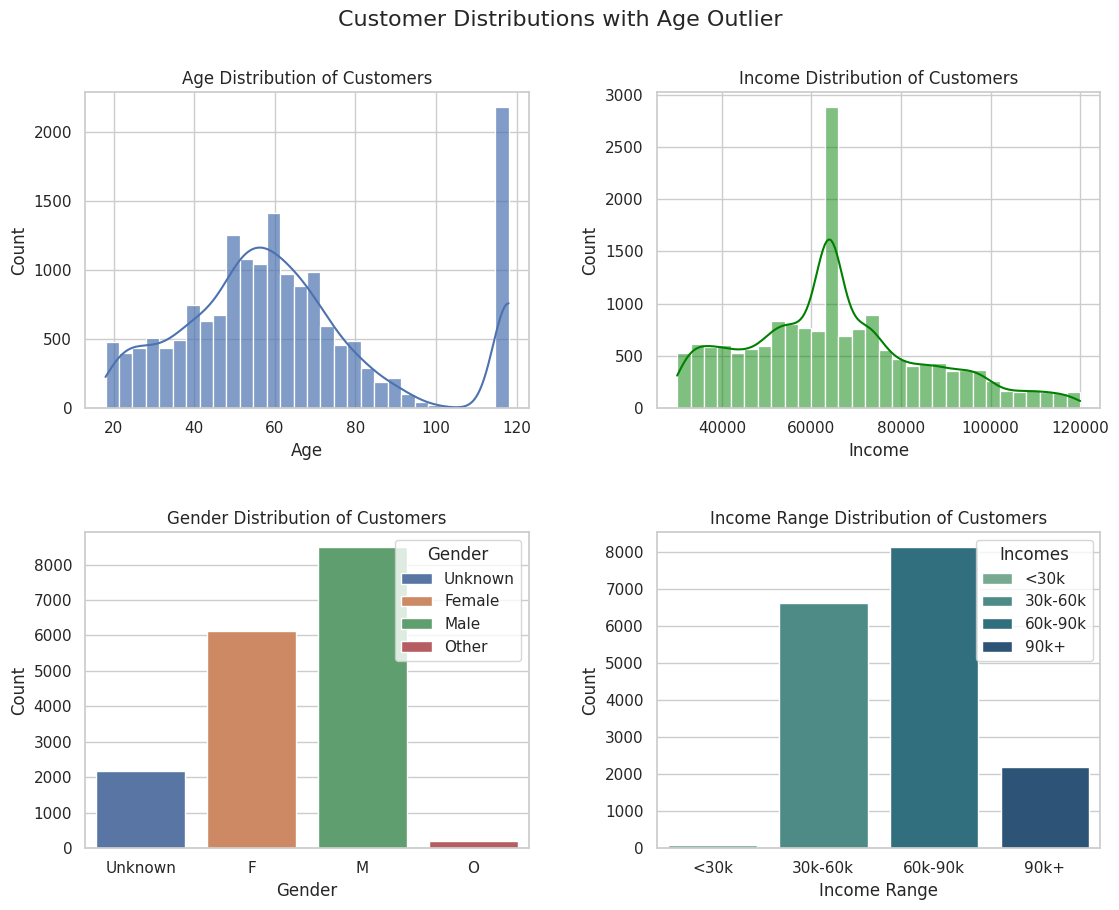

In [ ]:
# first plot with age outlier, (age == 118)
plot_customer_distributions(df_profile, 'Customer Distributions with Age Outlier')

<ipython-input-12-c9519768da8e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_range'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)


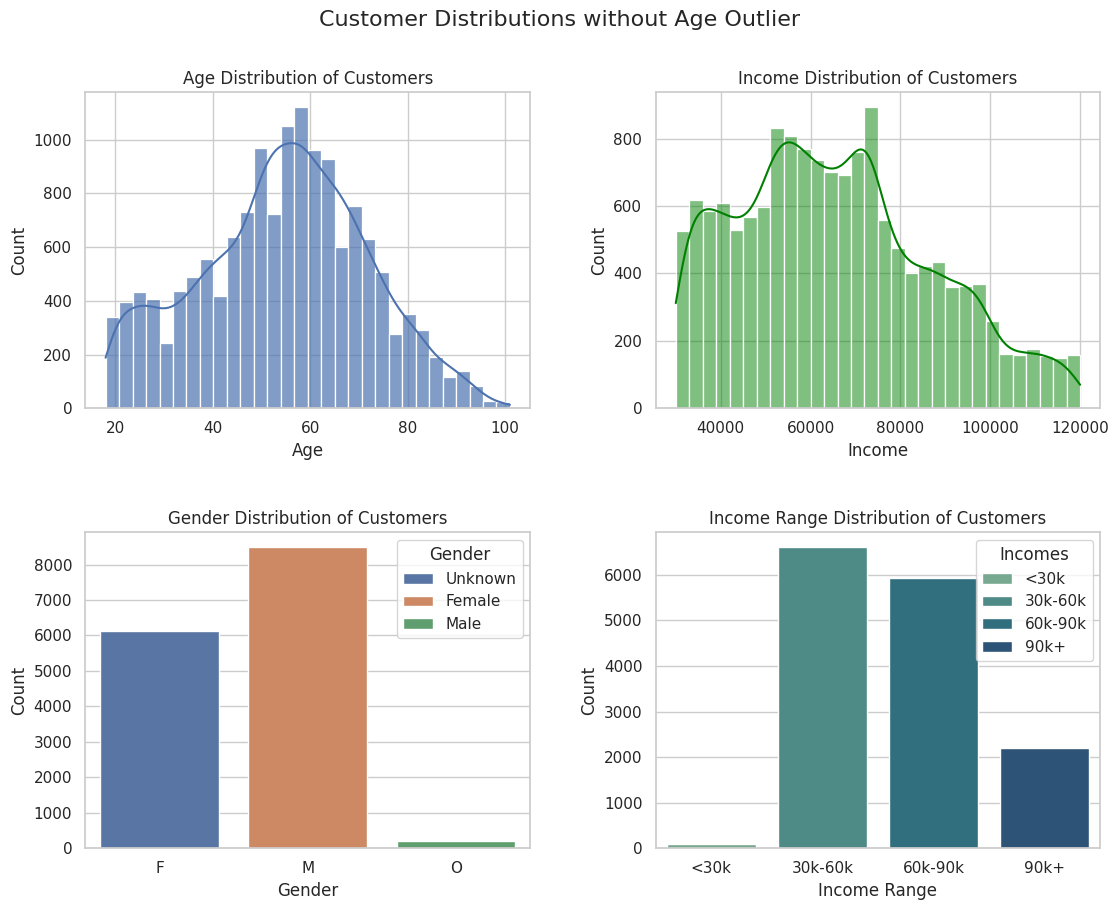

In [ ]:
# now plot without age outlier
plot_customer_distributions(df_profile_clean, 'Customer Distributions without Age Outlier')

In [ ]:
# look at mean total spend, mean offers recieved and mean offers completed
df_profile_clean.describe()

,Unnamed: 0,age,became_member_on,income,total_spent,num_transactions,num_offers_received,num_offers_viewed,num_offers_completed,total_reward,gender_code,membership_tenure
count,14825.000000,14825.000000,14825,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000,14825.000000
mean,8496.961079,54.393524,2017-02-18 12:30:15.419898880,65404.991568,117.028155,8.361349,4.485734,3.363238,2.188465,10.829073,0.600877,2818.478988
min,1.000000,18.000000,2013-07-29 00:00:00,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2296.000000
25%,4273.000000,42.000000,2016-05-20 00:00:00,49000.000000,31.450000,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,2504.000000
50%,8490.000000,55.000000,2017-08-02 00:00:00,64000.000000,87.040000,7.000000,5.000000,3.000000,2.000000,10.000000,1.000000,2654.000000
75%,12733.000000,66.000000,2017-12-30 00:00:00,80000.000000,160.900000,11.000000,5.000000,4.000000,3.000000,17.000000,1.000000,3093.000000
max,16999.000000,101.000000,2018-07-26 00:00:00,120000.000000,1608.690000,36.000000,6.000000,6.000000,6.000000,55.000000,2.000000,4119.000000
std,4896.261043,17.383705,NaN,21598.299410,129.965016,5.182667,1.074694,1.291316,1.582193,9.280086,0.518114,419.205158


# Visualize key patterns and relationships
- Identify significant trends
- Support findings with statistical analysis


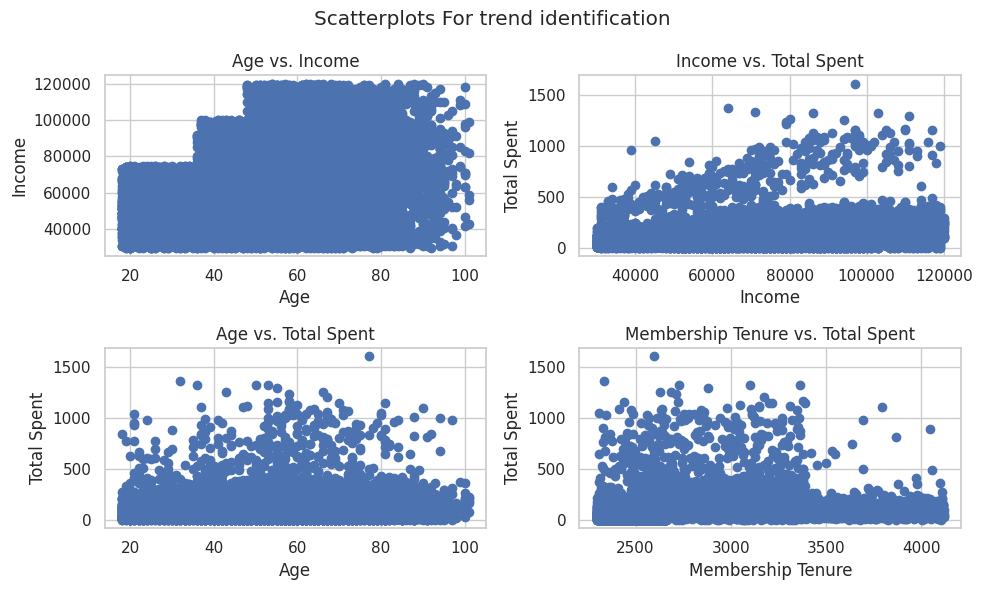

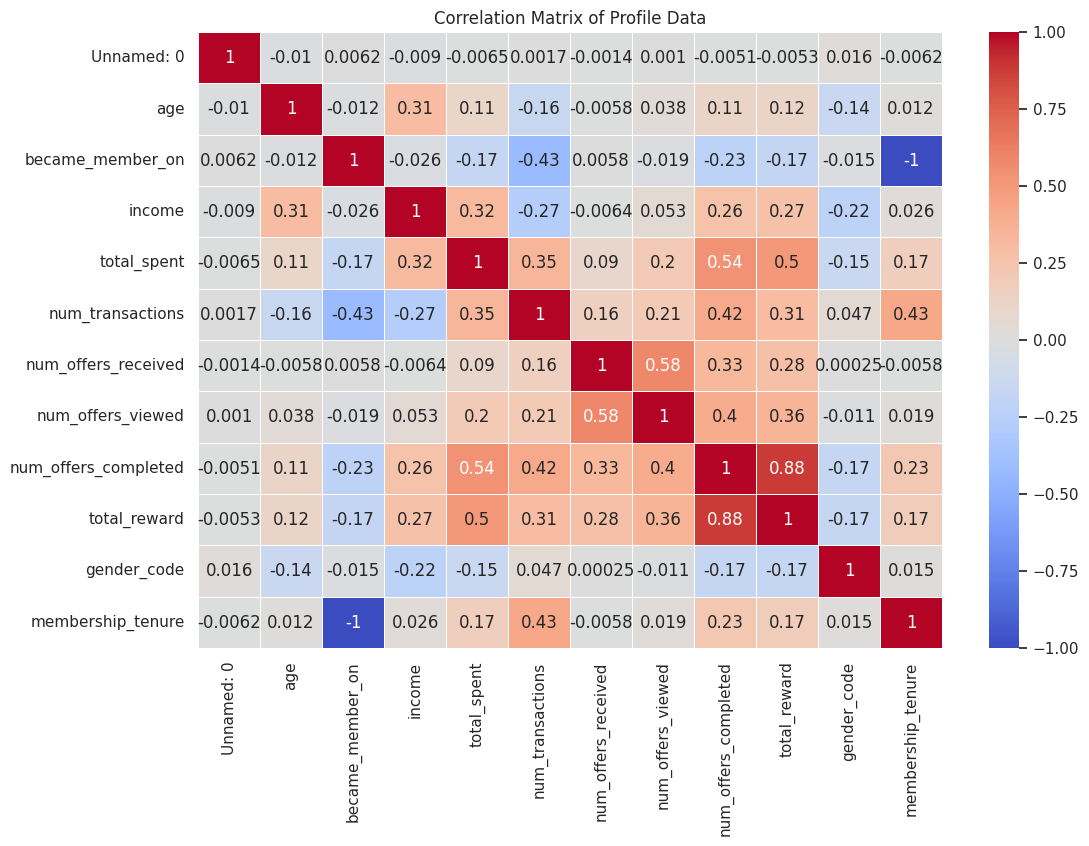

In [ ]:
# Add some more likely relevant visualiztion and trends

plt.figure(figsize=(10, 6))
plt.suptitle('Scatterplots For trend identification')
plt.subplot(2,2,1)
plt.scatter(df_profile_clean['age'], df_profile_clean['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')

plt.subplot(2,2,2)
plt.scatter(df_profile_clean['income'], df_profile_clean['total_spent'])
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Income vs. Total Spent')

plt.subplot(2,2,3)
plt.scatter(df_profile_clean['age'], df_profile_clean['total_spent'])
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Age vs. Total Spent')

plt.subplot(2,2,4)
plt.scatter(df_profile_clean['membership_tenure'], df_profile_clean['total_spent'])
plt.xlabel('Membership Tenure')
plt.ylabel('Total Spent')
plt.title('Membership Tenure vs. Total Spent')

plt.tight_layout()
plt.show()

print('  ')

# Find the correlation in the df_profile
df_profile_clean_corr = df_profile_clean.drop(columns=['id', 'gender', 'income_range'])

# Create a correlation matr
correlation_matrix = df_profile_clean_corr.corr()

# Create a heatmap to visualize the correlation matrix
fig = plt.figure(figsize=(12, 8))
g = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Profile Data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()





In [ ]:
# What causes higher spending?

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

Y = df_profile['total_spent']
features = ['age', 'gender_code', 'income', 'num_offers_viewed', 'total_reward', 'num_offers_completed', 'membership_tenure']
X = df_profile[features]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            total_spent   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1427.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:34:22   Log-Likelihood:            -1.0240e+05
No. Observations:               17000   AIC:                         2.048e+05
Df Residuals:                   16992   BIC:                         2.049e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -75.7031 

The scatter plots and correlation matrix identified a positive correlation between age and income and between income and total spend. Correlation between age and total spend and membership tenure and total spend is less clear. The correlation matrix highlighted some interesting relationships. Fortunately for the Starbucks marketing department number of total offers and total spend were highly correlated.

Supporting these findings we ran a ordinary least squares model with the independant variable being total spend. The dependent variables included age, gender, income, number_offers_viewed, total reward, num offers completed, and membership tenure. Practically all varibles are significant with the exception of num_offers_viewed. The overall perdictive power of the model is not strong with a R^2 of 0.37. Additionally high multicolinearity makes the coefficient values less meaningful, for example removing 'total_reward' and 'num_offers_completed' shifts significance to 'num_offers_viewed'. This model does confirm the correlations with the expected signs of income and membership tenure in the positive direction.

The dependent variables num_offers_viewed, total_reward, num_offers_completed, show that marketing has a positive correlation with total spend but offers viewed, offers completed, and reward amount all contribute but cannot be meaningfully quantified with this model.


#Customer Segmentation

In this section, we will implement KMeans clustering to identify distinct customer segments based on Age and Income demographics.

<ipython-input-15-51cb8b62451f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile_clean['customer_segment'] = kmeans.fit_predict(features_scaled)


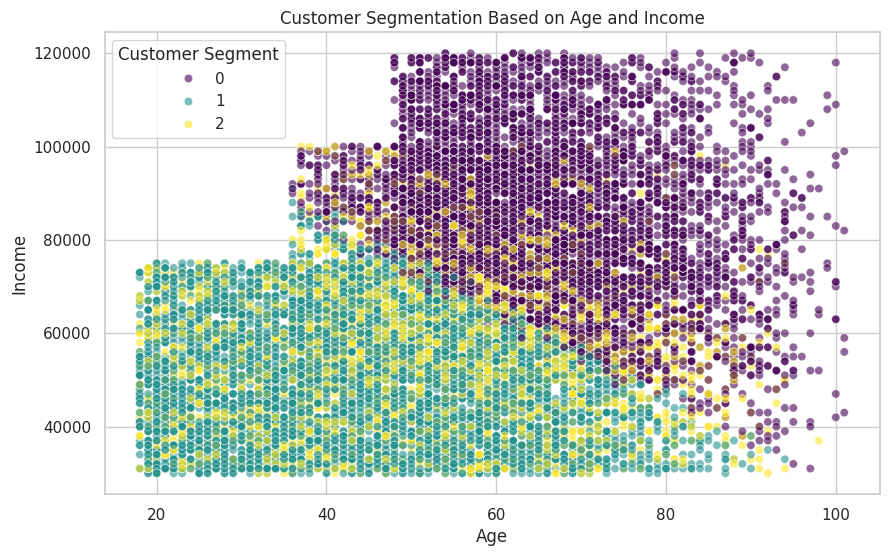

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
features = df_profile_clean[['age', 'income', 'membership_tenure']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_profile_clean['customer_segment'] = kmeans.fit_predict(features_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_profile_clean['age'], y=df_profile_clean['income'], hue=df_profile_clean['customer_segment'], palette='viridis', alpha=0.6)
plt.title('Customer Segmentation Based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Customer Segment')
plt.show()

# Channel Effectiveness

In this section, we analyze the effectiveness of different communication channels used by Starbucks to promote offers to its customers. Understanding which channels yield the best results for various customer segments is crucial for optimizing marketing strategies and improving customer engagement.

### Analysis Overview

To assess channel effectiveness, we focus on two key questions:

1. **Which communication channels are most effective for different customer segments?**
2. **Does multi-channel marketing improve offer success?**

### Methodology

1. **Data Preparation**: We began by merging the `transcript` and `portfolio` datasets to associate customer demographics with offer events. We then merged the `profile` dataset with that set. This allows us to analyze customer responses based on communication channels while taking into account age, gender and income segments.

2. **Channel Effectiveness**: We filtered the dataset to include only offers that were completed. By grouping the data by communication channel and the various customer segments, we counted the number of completed offers for each channel by each of the segments...age, gender, and income.

### Results and Visualization

The results indicate the number of offers completed by channel and segmented by age, gender, or income, as visualized in the bar plots. These plots reveal which channels—such as email, mobile, web, and social—are most effective for different customer segments.

### Insights

- **Effective Channels**: The bar plots help identify the communication channels that resonate most with specific customer segments, allowing Starbucks to tailor their marketing strategies accordingly.

Understanding these aspects of channel effectiveness will enable Starbucks to optimize its promotional strategies, enhance customer engagement, and ultimately drive sales growth.


In [ ]:
# Merge transcript with portfolio to get channel information
merged_df = df_transcript.merge(df_portfolio, left_on='offer_id', right_on='id', how='left')

# Merge the result with profile to include customer demographics
merged_df = merged_df.merge(df_profile_clean, left_on='person', right_on='id', how='left')

# Now check if the merge was successful
print(merged_df.columns)  # This should include features from all three dataframes

# Filter for completed offers
offers_completed = merged_df[merged_df['event'] == 'offer completed']

Index(['Unnamed: 0_x', 'person', 'event', 'value', 'time', 'amount',
       'offer_id', 'reward_x', 'Unnamed: 0_y', 'reward_y', 'channels',
       'difficulty', 'duration', 'offer_type', 'id_x', 'Unnamed: 0', 'gender',
       'age', 'id_y', 'became_member_on', 'income', 'total_spent',
       'num_transactions', 'num_offers_received', 'num_offers_viewed',
       'num_offers_completed', 'total_reward', 'gender_code',
       'membership_tenure', 'income_range', 'customer_segment'],
      dtype='object')


In [ ]:
def plot_channel_effectiveness(data, plot_title, segment, legend_title, palette):
    # Plotting Channel Effectiveness by Segment
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='channels', y='count', hue=segment, palette=palette, ci=None)
    plt.title(plot_title)
    plt.xlabel('Communication Channel')
    plt.ylabel('Number of Offers Completed')
    plt.legend(title=legend_title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

                        channels   age  count age_range
0  ['email', 'mobile', 'social']  18.0     12       NaN
1  ['email', 'mobile', 'social']  19.0     21      Teen
2  ['email', 'mobile', 'social']  20.0     21      Teen
3  ['email', 'mobile', 'social']  21.0     21     20-30
4  ['email', 'mobile', 'social']  22.0     20     20-30



<ipython-input-17-573fed9649b4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='channels', y='count', hue=segment, palette=palette, ci=None)


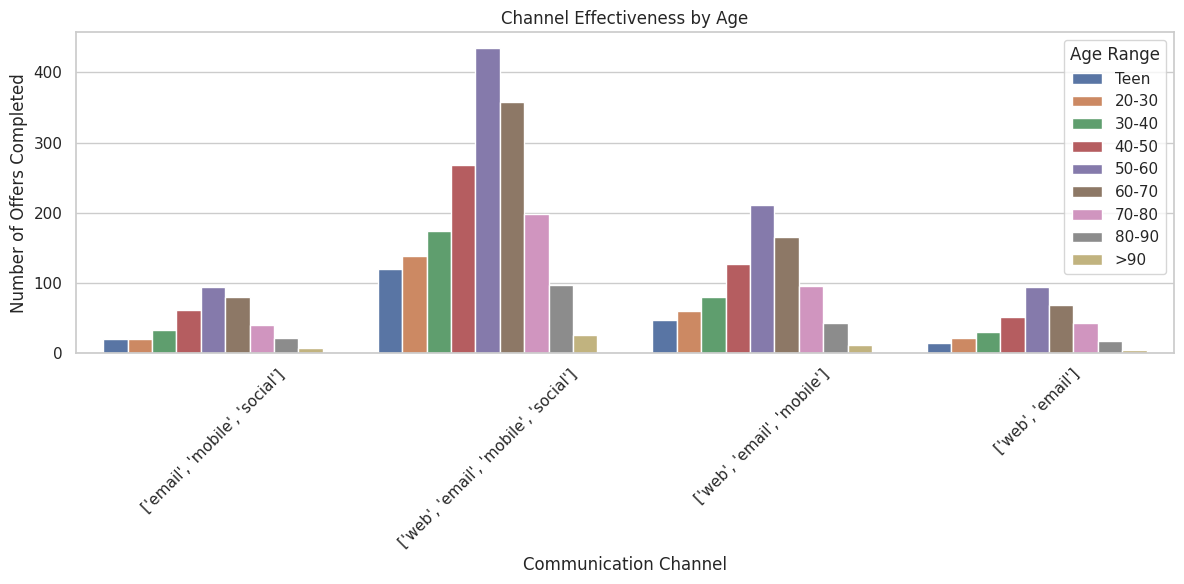

In [ ]:
# Age Range Distribution
age_bins = [18, 20, 30, 40, 50, 60, 70, 80, 90, 110]  # Define age bins
age_labels = ['Teen', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90']  # Labels for the age bins

# Count the number of offers completed by channel and age
channel_effectiveness_by_age = offers_completed.groupby(['channels', 'age']).size().reset_index(name='count')
channel_effectiveness_by_age['age_range'] = pd.cut(channel_effectiveness_by_age['age'], bins=age_bins, labels=age_labels)
print(channel_effectiveness_by_age.head())
print()

plot_channel_effectiveness(channel_effectiveness_by_age, 'Channel Effectiveness by Age', 'age_range', 'Age Range', 'deep')

                               channels gender  count
0         ['email', 'mobile', 'social']      F   1857
1         ['email', 'mobile', 'social']      M   1741
2         ['email', 'mobile', 'social']      O     59
3  ['web', 'email', 'mobile', 'social']      F   8067
4  ['web', 'email', 'mobile', 'social']      M   8990



<ipython-input-17-573fed9649b4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='channels', y='count', hue=segment, palette=palette, ci=None)


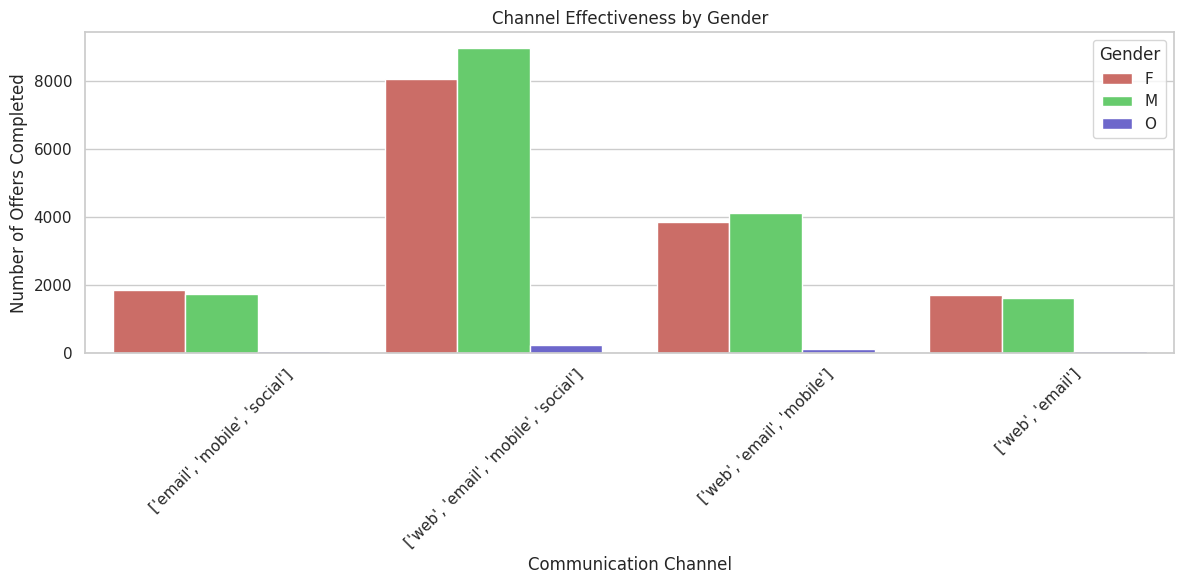

In [ ]:
# Count the number of offers completed by channel and gender
channel_effectiveness_by_gender = offers_completed.groupby(['channels', 'gender']).size().reset_index(name='count')
print(channel_effectiveness_by_gender.head())
print()

plot_channel_effectiveness(channel_effectiveness_by_gender, 'Channel Effectiveness by Gender', 'gender', 'Gender', 'hls')

                        channels   income  count income_range
0  ['email', 'mobile', 'social']  30000.0      8         <30k
1  ['email', 'mobile', 'social']  31000.0     36      30k-60k
2  ['email', 'mobile', 'social']  32000.0     23      30k-60k
3  ['email', 'mobile', 'social']  33000.0     28      30k-60k
4  ['email', 'mobile', 'social']  34000.0     21      30k-60k



<ipython-input-17-573fed9649b4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='channels', y='count', hue=segment, palette=palette, ci=None)


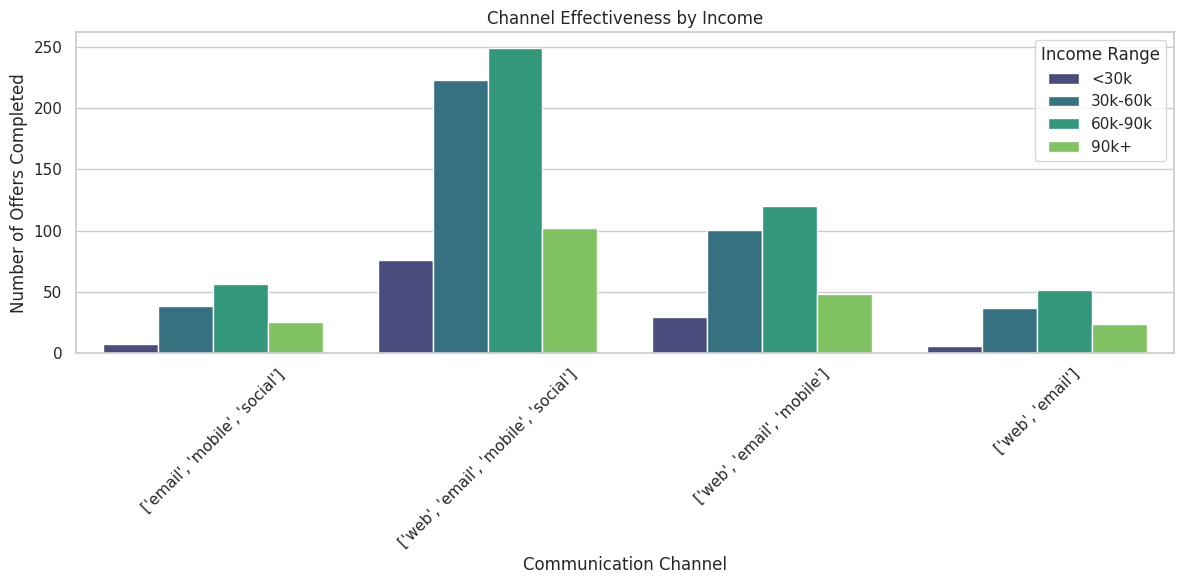

In [ ]:
# Income Range Distribution
income_bins = [0, 30000, 60000, 90000, 120000]  # Define income bins
income_labels = ['<30k', '30k-60k', '60k-90k', '90k+']  # Labels for the bins

# Count the number of offers completed by channel and income
channel_effectiveness_by_income = offers_completed.groupby(['channels', 'income']).size().reset_index(name='count')
channel_effectiveness_by_income['income_range'] = pd.cut(channel_effectiveness_by_income['income'], bins=income_bins, labels=income_labels)
#channel_effectiveness_by_income = channel_effectiveness_by_income.groupby(['channels', 'income_range']).size().reset_index(name='count')
print(channel_effectiveness_by_income.head())
print()

plot_channel_effectiveness(channel_effectiveness_by_income, 'Channel Effectiveness by Income', 'income_range', 'Income Range', 'viridis')

# Promotional Impact Analysis

In this section, we analyze the impact different offers used by Starbucks on revenue. Understanding which offers yield the best results is crucial for developing ongoing marketing strategies and maintaining cost effective offers.

### Analysis Overview

To assess promotional impact, we focus on the a customers total spend in a 90-day window after a promotion occurs. This shows the immeadiate impact of a promotional event. We will look only at offers completed to capture the clearist signal from each event. Follow on analysis could look at the effect of promotions viewed but not completed.

### Methodology

**Feasability**
  - We created a treatment group that recieved one offer and a control group that did not for comparison.
  - We checked for enough observations/customers and if the groups are similar based on avilable demographics like age, income, and gender
  - We then calculated the 90-hour window for the for individuals in the two groups. Here we introduced randomness by chosing start dates for the control group. This was done by chosing a start date from the treatment group at random.
  - We then estimated the effect of being in the treatment group on the total spent in the 90-hour window using and OLS model.

**Implmentation**
  - We applied the same steps for the first offer to all 8 offers that customers completed.
  - The the estimated effect for each event was saved along with standard error from the OLS model additionally controlling for demographics, other marketing efforts, and customer loyalty.
  - The estimated effect was merged with the portfolio table and plotted

### Results and Visualization

The estimates from each regression are significant and there is an increase in spending in the 90-hour window for all offers after controling for demographics, other offers, and customer loyalty.
The bar plot "Average Increase in Total Spend for 90-hours Post Offer" shows the the mean increase in spending for customers that completed an offer vary between ~$15 and ~$6 depending on an offer. The following bar plot "90-hour Post Increase compared to Reward" shows offers with larger rewards tended to also have larger increase in mean spending. There is one clear outlier offer "G" which had a reward of 2 but estimated increase of ~$11.


### Insights
Two actionable insights come from this:
1. The promotional offers are increaseing customer spend and are offseting their reward cost. Starbucks should increase the frequency or number of these offers to maximize spend.
2. Offer "G" (id: fafdcd668e3743c1bb461111dcafc2a4) is a clear winner. It has a low reward, high participation, and high expected increase in spend. Future offers Starbucks makes should be like "G".

## Feasability: Quasi-experimental comparison for one event
The goal here is to create a treatment group that recieved one offer and a control group. By comparing the advertisment to a sufficently similar control than we can determine if the advertisment had an effect on a chosen outcome varible.
For feasability we need to check for enough observations/participants and if the groups are similar based on avilable demographics like age, income and gender. We will also need to control for loyalty and other events in our final model.


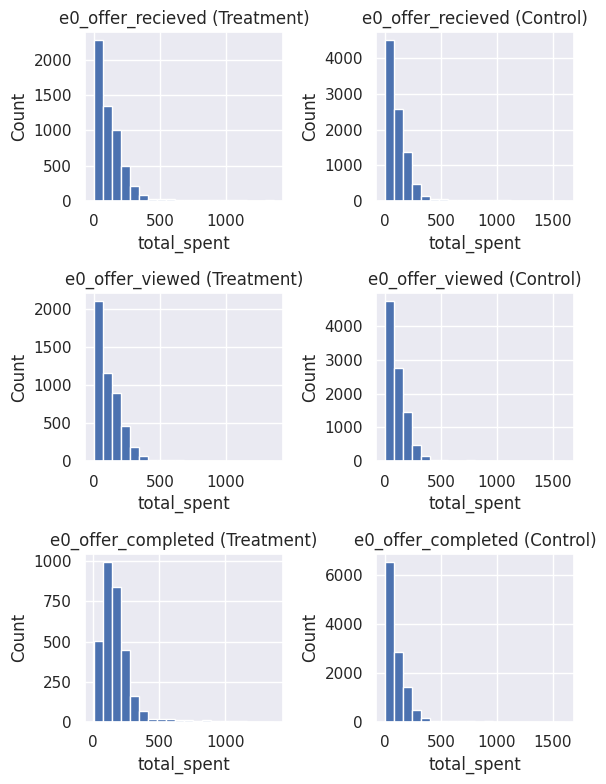

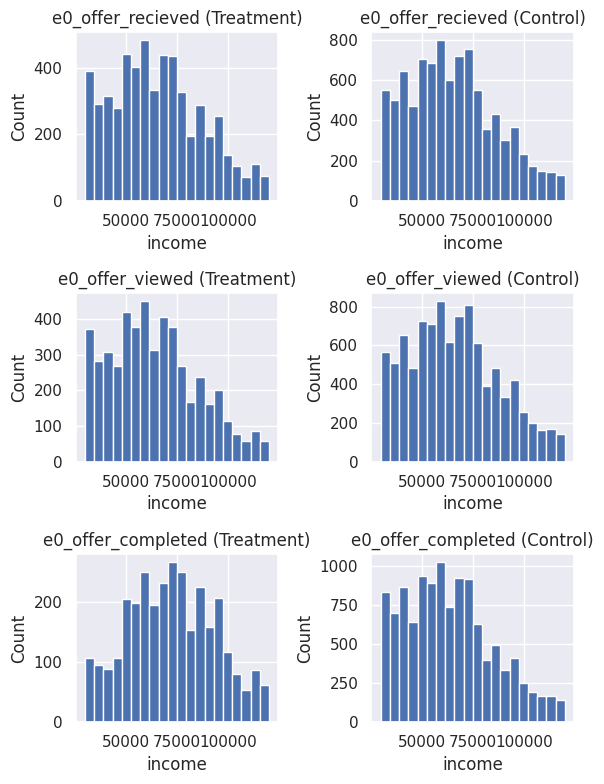

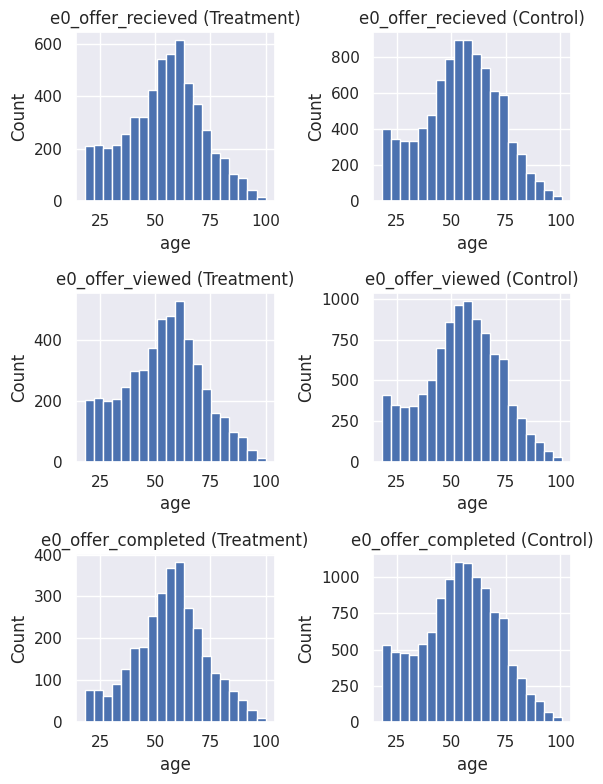

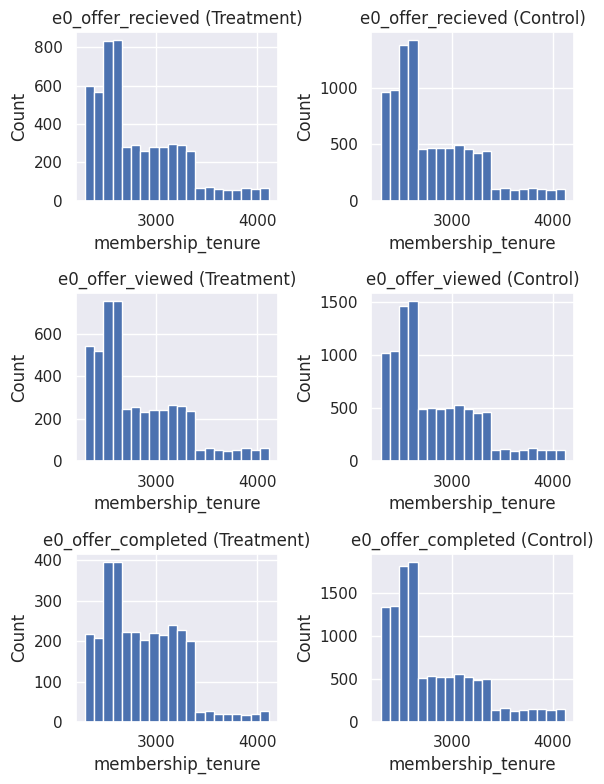

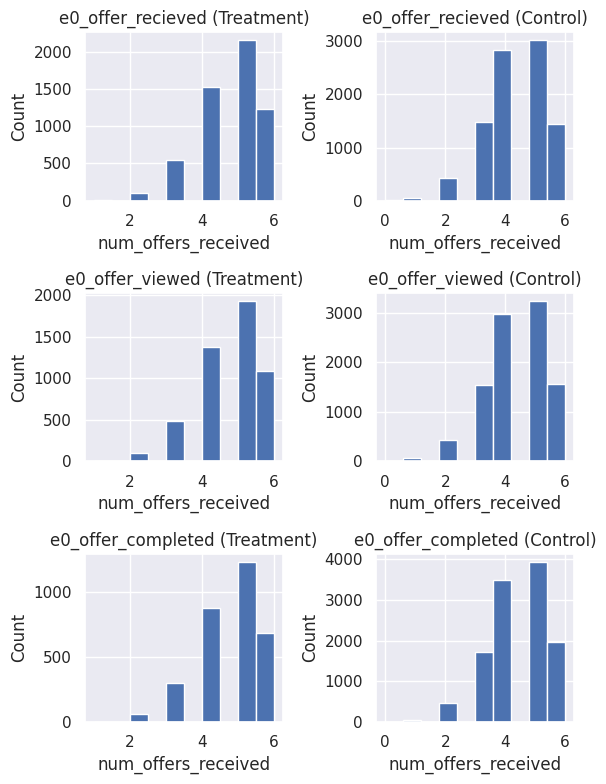

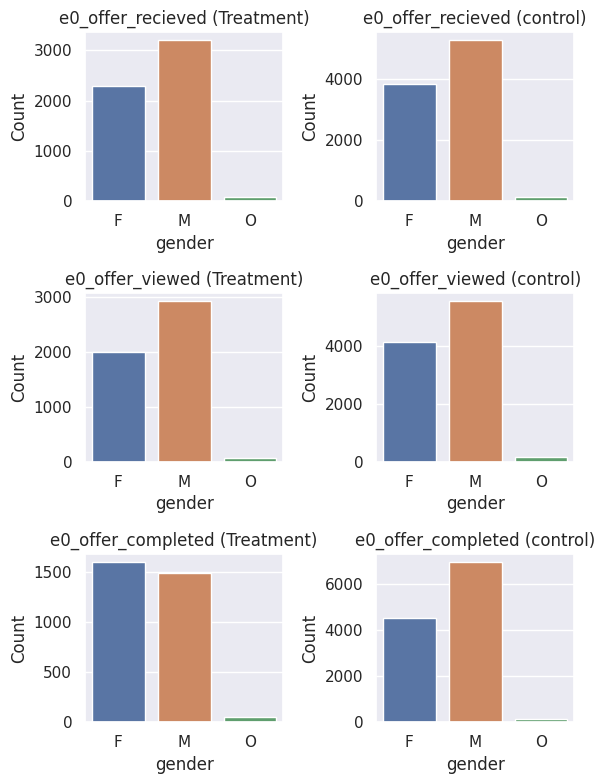

In [ ]:
# columns for reference
# merged_df.columns
# Index(['Unnamed: 0_x', 'person', 'event', 'value', 'time', 'amount',
#        'offer_id', 'reward_x', 'Unnamed: 0_y', 'reward_y', 'channels',
#        'difficulty', 'duration', 'offer_type', 'id_x', 'Unnamed: 0', 'gender',
#        'age', 'id_y', 'became_member_on', 'income', 'total_spent',
#        'num_transactions', 'num_offers_received', 'num_offers_viewed',
#        'num_offers_completed', 'total_reward', 'gender_code',
#        'membership_tenure', 'income_range', 'customer_segment'],
#       dtype='object')

# events for reference
# df_portfolio['id']
# 0	ae264e3637204a6fb9bb56bc8210ddfd
# 1	4d5c57ea9a6940dd891ad53e9dbe8da0
# 2	3f207df678b143eea3cee63160fa8bed
# 3	9b98b8c7a33c4b65b9aebfe6a799e6d9
# 4	0b1e1539f2cc45b7b9fa7c272da2e1d7
# 5	2298d6c36e964ae4a3e7e9706d1fb8c2
# 6	fafdcd668e3743c1bb461111dcafc2a4
# 7	5a8bc65990b245e5a138643cd4eb9837
# 8	f19421c1d4aa40978ebb69ca19b0e20d
# 9	2906b810c7d4411798c6938adc9daaa5


# Flag customers that received, viewed, and completed offer 0, "e0"
e0_offer_recieved = merged_df[(merged_df['event'] == 'offer received') & (merged_df['offer_id'] == 'ae264e3637204a6fb9bb56bc8210ddfd')]
e0_offer_viewed = merged_df[(merged_df['event'] == 'offer viewed') & (merged_df['offer_id'] == 'ae264e3637204a6fb9bb56bc8210ddfd')]
e0_offer_completed = merged_df[(merged_df['event'] == 'offer completed') & (merged_df['offer_id'] == 'ae264e3637204a6fb9bb56bc8210ddfd')]

df_profile_clean['e0_offer_recieved'] = df_profile_clean['id'].isin(e0_offer_recieved['person']).astype(int)
df_profile_clean['e0_offer_viewed'] = df_profile_clean['id'].isin(e0_offer_viewed['person']).astype(int)
df_profile_clean['e0_offer_completed'] = df_profile_clean['id'].isin(e0_offer_completed['person']).astype(int)

df_profile_clean.describe()

#Compare and visualize to control groups across recieved, viewed, completed

def make_plots(hist_var, title, num_bins):
  fig = plt.figure(figsize=(6,8))

  # plt.suptitle(title, fontsize=16, y=0.94)
  for i, col in enumerate(['e0_offer_recieved', 'e0_offer_viewed', 'e0_offer_completed']):
      plt.subplot(3,2,(2*(i+1)-1))
      plt.hist(df_profile_clean[df_profile_clean[col] == 1][hist_var], bins=num_bins)
      plt.xlabel(hist_var)
      plt.ylabel('Count')
      plt.title(col + ' (Treatment)')
      plt.subplot(3,2,(2*(i+1)))
      plt.hist(df_profile_clean[df_profile_clean[col] == 0][hist_var], bins=num_bins)
      plt.xlabel(hist_var)
      plt.ylabel('Count')
      plt.title(col + ' (Control)')
  fig.tight_layout()
  plt.show()

make_plots('total_spent', 'Total Spent', 20)
make_plots('income', 'Income', 20)
make_plots('age', 'Age', 20)
make_plots('membership_tenure', 'Membership Tenure', 20)
make_plots('num_offers_received', 'num_offers_received', 10 )

fig = plt.figure(figsize=(6,8))
# plt.suptitle("gender", fontsize=16, y=0.94)
for i, col in enumerate(['e0_offer_recieved', 'e0_offer_viewed', 'e0_offer_completed']):
  plt.subplot(3,2,(2*(i+1)-1))
  sns.countplot(data=df_profile_clean[df_profile_clean[col] == 1], x='gender', palette='deep', hue='gender')
  plt.xlabel('gender')
  plt.ylabel('Count')
  plt.title(col + ' (Treatment)')
  plt.subplot(3,2,(2*(i+1)))
  sns.countplot(data=df_profile_clean[df_profile_clean[col] == 0], x='gender', palette='deep', hue='gender')
  plt.xlabel('gender')
  plt.ylabel('Count')
  plt.title(col + ' (control)')
fig.tight_layout()
plt.show()






Histograms for age, income, and gender are pretty similar for recieved and viewed.

For offer completed the histograms for all three are different enough it seems necessary to reduce selection bais. The effect on total spent is also slightly more for offer completed. Good news for starbucks it seems this offer will increase transactions. For now instead of propensity matching we will try to control for these demographics in our outcomes analysis. I don't think we have enough observations to get a perfect unbiased matches.




## Feasability: Define Outcome Metrics
What metrics will have meaning in this dataset?
One possible option would be to look at transaction frequency. It would be interesting if an event increased the transaction count for participants. Ultimatly, the best feasible outcome would be to look at revenue. Total spend looks at too large of a time frame. There are 10 marketing events and they each will have an effect on total spend. Looking at total transactions for a window after the event is completed would mostly seperate out each event's effect. For feasability lets look at a 90 hour post event window.

This lets us inntroduce some randomness into the control cohort too as we need to give them a starting time. We will assign offer_completed time to the control group by randomly choseing an offer_completed day from the treatment group.

If the 90 hour post window doesn't get results we can look at a difference in difference model.

In [ ]:
# what is the 90 day rolling mean? $12.63
df_transactions = df_transcript[df_transcript['event'] == 'transaction'].sort_values(by=['person', 'time'])

df_transactions['moving_mean'] = (
    df_transactions.groupby('person')['amount']
    .rolling(window=90, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

df_transactions.describe()

,Unnamed: 0,time,amount,reward,moving_mean
count,138953.000000,138953.000000,138953.000000,0.0,138953.000000
mean,160710.678676,381.584334,12.777356,NaN,12.639342
std,90463.542633,201.697230,30.250529,NaN,18.239182
min,12654.000000,0.000000,0.050000,NaN,0.050000
25%,85177.000000,210.000000,2.780000,NaN,3.143750
50%,150201.000000,402.000000,8.890000,NaN,10.105000
75%,239167.000000,552.000000,18.070000,NaN,18.510000
max,306533.000000,714.000000,1062.280000,NaN,962.100000


In [ ]:
import random
random.seed(42)

# retrive the completed time from e0
test = df_profile_clean.merge(e0_offer_completed[['person', 'time']], left_on='id', right_on='person', how='left')
test = test.drop(columns=['person'])
test = test.rename(columns={'time': 'e0_completed_time'})

# Create Transactions df
df_transactions = df_transcript[df_transcript['event'] == 'transaction'].rename(columns={'person': 'id'})
times = test['e0_completed_time'].dropna()
print(times.info())
# print(test['e0_completed_time'].head())
# print(test.isna().sum())

# fill the control with a random choice of a time from the treatment group

test['e0_completed_time'] = test['e0_completed_time'].apply(lambda x: x if not np.isnan(x) else np.random.choice(times))
print(test['e0_completed_time'].head())
# print(test.isna().sum())

# calculate the sum of transactions 90 hours after offer:
df_temp = test.merge(df_transactions, on='id', how='left', suffixes=('_profile', '_transaction'))
# flag applicable transactions
df_temp['within_90_units'] = df_temp['time'] <= df_temp['e0_completed_time'] + 90 #flag <= e0_t+90
df_temp['within_90_units'] &= df_temp['time'] > df_temp['e0_completed_time'] # perform and & op when assigning the result of the comparison
# sum transactions w flag
sum_within_90 = df_temp[df_temp['within_90_units']].groupby('id')['amount'].sum().reset_index()

test = test.merge(sum_within_90, on='id', how='left')
test = test.rename(columns={'amount': 'amount_within_90'})
test.info()
test = test.dropna()

# value are NaN if there are no transaction in the window this drop introduces the opposite of selection bias
#   only customers in the control that spend in that window are being compared to not all other customers.
#   there are far more in the control than in the treatment

print(test.groupby('e0_offer_completed')['id'].count())
test.groupby('e0_offer_completed')['amount_within_90'].mean()
test.groupby('e0_offer_completed')[['amount_within_90', 'e0_completed_time']].mean()


# def make_plots(df, hist_var, title, num_bins):
#   plt.figure(figsize=(10,12))
#   plt.suptitle(title, fontsize=16, y=0.94)
#   for i, col in enumerate(['e0_offer_recieved', 'e0_offer_viewed', 'e0_offer_completed']):
#       plt.subplot(3,2,(2*(i+1)-1))
#       plt.hist(df[df[col] == 1][hist_var], bins=num_bins)
#       plt.xlabel(hist_var)
#       plt.ylabel('Count')
#       plt.title(col + ' (Treatment)')
#       plt.subplot(3,2,(2*(i+1)))
#       plt.hist(df[df[col] == 0][hist_var], bins=num_bins)
#       plt.xlabel(hist_var)
#       plt.ylabel('Count')
#       plt.title(col + ' (Control)')
#   plt.show()

# # make_plots(test, 'income', 'Income', 20)
# # make_plots(test, 'age', 'Age', 20)
# # make_plots(test, 'amount_within_90', '90 Day total spend', 20)

test.columns

<class 'pandas.core.series.Series'>
Index: 3657 entries, 1 to 15334
Series name: e0_completed_time
Non-Null Count  Dtype  
--------------  -----  
3657 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
0    642.0
1    510.0
2    630.0
3    390.0
4    366.0
Name: e0_completed_time, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            15336 non-null  int64         
 1   gender                15336 non-null  object        
 2   age                   15336 non-null  int64         
 3   id                    15336 non-null  object        
 4   became_member_on      15336 non-null  datetime64[ns]
 5   income                15336 non-null  float64       
 6   total_spent           15336 non-null  float64       
 7   num_transactions      15336 non-null  int64         

Index(['Unnamed: 0', 'gender', 'age', 'id', 'became_member_on', 'income',
       'total_spent', 'num_transactions', 'num_offers_received',
       'num_offers_viewed', 'num_offers_completed', 'total_reward',
       'gender_code', 'membership_tenure', 'income_range', 'customer_segment',
       'e0_offer_recieved', 'e0_offer_viewed', 'e0_offer_completed',
       'e0_completed_time', 'amount_within_90'],
      dtype='object')

In [ ]:
model = smf.ols(formula='amount_within_90 ~ e0_offer_completed + age + income + gender_code + membership_tenure + num_transactions + num_offers_completed', data=test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       amount_within_90   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     155.0
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.05e-217
Time:                        19:34:38   Log-Likelihood:                -51344.
No. Observations:                9576   AIC:                         1.027e+05
Df Residuals:                    9568   BIC:                         1.028e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -20.8545 

Overall the regression is not very predictive however given the r-squared. However we see a significant and sizable effect of e0_offer_completed at ~16.3. This model robustly controls for demographic factors (age, income, gender) and loyalty factors (membership_tenure, num_transactions (total)) and other marketing effects (num_offers_completed). I would interpret this as on average all other factors held equal the individuals who chose to complete `e0` spends 16.3 more dollars than those who don't.

Next steps is to make this analysis more effcient and apply it to all of the offers so we can compare impact of each offer. For simplicity sake lets just look at offer_completed and leave offer_viewed and offer_received in the the feasability step.

# Applying Quasi-RCT with 90-Hour Spend Window Outcome
Feasibility showed on one event that it is possible to compare groups that completed the offer and those that didn't in a statistical meaningful way.




In [ ]:

def calculate_impact(promotion, df_profile, df_transcript):
  """ caluates impact of a promotion using a 90-hour total spend window

  Args:
    promotion (str): offer_id of a promotion
    df_profile (df): data frame of customer profile
    df_transcript (df): data frame with offer details and transaction details

  Returns:
    tuple: (promotion, model results, df_results)
  """
  # flag customers that completed promotion
  promotion_df = df_transcript[(df_transcript['event'] == 'offer completed') & (df_transcript['offer_id'] == promotion)]  # this is e0_offer_completed
  # print(promotion_df.head())
  promotion_completed = 'completed_'+promotion      #'e0_offer_completed' = promotion_completed
  df_profile[promotion_completed] = df_profile['id'].isin(promotion_df['person']).astype(int)  #sneakily adds columns to df profile


  # Retrive the completed time from promotion
  impact_df = df_profile.merge(promotion_df[['person', 'time']], left_on='id', right_on='person', how='left')
  impact_df = impact_df.drop(columns=['person'])
  promotion_completed_time = promotion_completed + '_time'
  impact_df = impact_df.rename(columns={'time': promotion_completed_time})
  # print(impact_df.info())

  # Seperate the times retrived and asign times to control group ith a random choice of a time from the treatment group
  times = impact_df[promotion_completed_time].dropna()
  impact_df[promotion_completed_time] = impact_df[promotion_completed_time].apply(lambda x: x if not np.isnan(x) else np.random.choice(times))

  # create Transactions df
  df_transactions = df_transcript[df_transcript['event'] == 'transaction'].rename(columns={'person': 'id'})

  # calculate outcome var for each customer
  # calculate the sum of transactions 90 hours after offer:
  df_temp = impact_df.merge(df_transactions, on='id', how='left', suffixes=('_profile', '_transaction'))
  # flag applicable transactions
  df_temp['within_90_units'] = df_temp['time'] <= df_temp[promotion_completed_time] + 90 #flag <= e0_t+90
  df_temp['within_90_units'] &= df_temp['time'] > df_temp[promotion_completed_time] # perform and & op when assigning the result of the comparison
  # sum transactions w flag
  sum_within_90 = df_temp[df_temp['within_90_units']].groupby('id')['amount'].sum().reset_index()

  # add outcome var to df
  impact_df = impact_df.merge(sum_within_90, on='id', how='left')
  outcome = 'amount_within_90_'+promotion
  impact_df = impact_df.rename(columns={'amount': outcome})
  impacrt_df = impact_df.dropna()


  # Fit model
  formula = f'{outcome} ~ {promotion_completed} + age + income + gender_code + membership_tenure + num_transactions + num_offers_completed'
  # print(formula)
  model = smf.ols(formula=formula, data=impact_df).fit()

  # only select necessary cols for return
  df_results = impact_df[['id', outcome, promotion_completed, promotion_completed_time]]



  return (promotion, model, df_results)

# # test function preformance on test case in cells above
# results = calculate_impact('ae264e3637204a6fb9bb56bc8210ddfd', df_profile_clean, df_transcript)
# print(results[0])
# print(results[1].summary())
# print(results[2].info())

## Debug there are not enough '_amount_within_90'


In [ ]:
# Remove offers where the offer was not completed
df_transcript[(df_transcript['offer_id'] == '3f207df678b143eea3cee63160fa8bed')].groupby('event').count()
df_transcript[(df_transcript['offer_id'] == '5a8bc65990b245e5a138643cd4eb9837')].groupby('event').count()
df_portfolio.head(10)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [ ]:
# print(df_portfolio['id'])
import warnings
warnings.filterwarnings('ignore')

# df_portfolio_analysis = df_portfolio[(df_portfolio['id'] != '3f207df678b143eea3cee63160fa8bed') & (df_portfolio['id'] != '5a8bc65990b245e5a138643cd4eb9837')]
df_portfolio_analysis = df_portfolio[df_portfolio['offer_type'] != 'informational']

results = []
ids = []
params_list = []
bse_list = []

for id in df_portfolio_analysis['id']:
  res = calculate_impact(id, df_profile_clean, df_transcript)
  results.append(res)
  ids.append(id)
  params_list.append(res[1].params[1])
  bse_list.append(res[1].bse[1])
  # print(res[1].summary())


expected_90_day_increase = pd.DataFrame({'id': ids, 'coef': params_list, 'bse': bse_list})
df_portfolio = df_portfolio.merge(expected_90_day_increase, on='id', how='left')

df_portfolio.head(10)


,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id,coef,bse
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,14.416651,1.363061
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,13.299593,1.301439
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,NaN,NaN
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,8.227411,1.304956
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,8.140452,1.255207
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,7.867336,0.931808
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,12.629940,1.312636
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,8.977591,1.139334
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,6.987292,1.139071


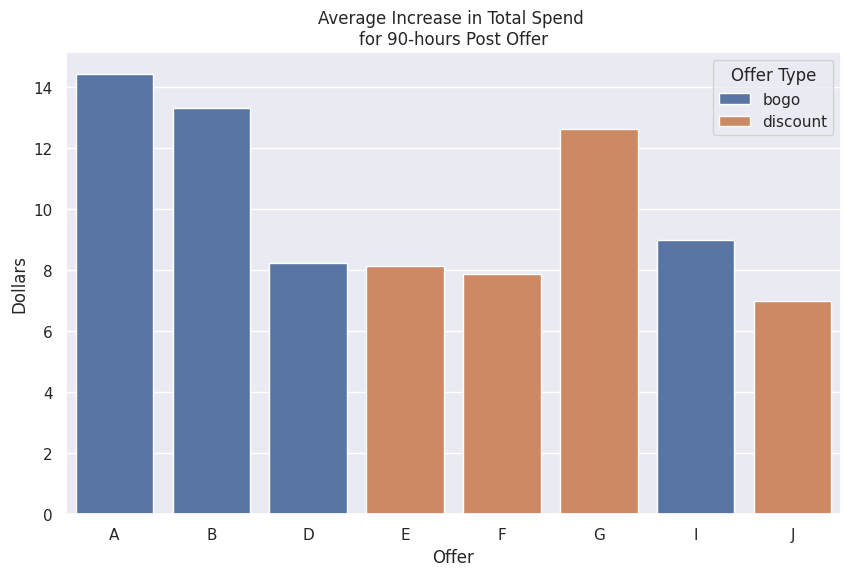

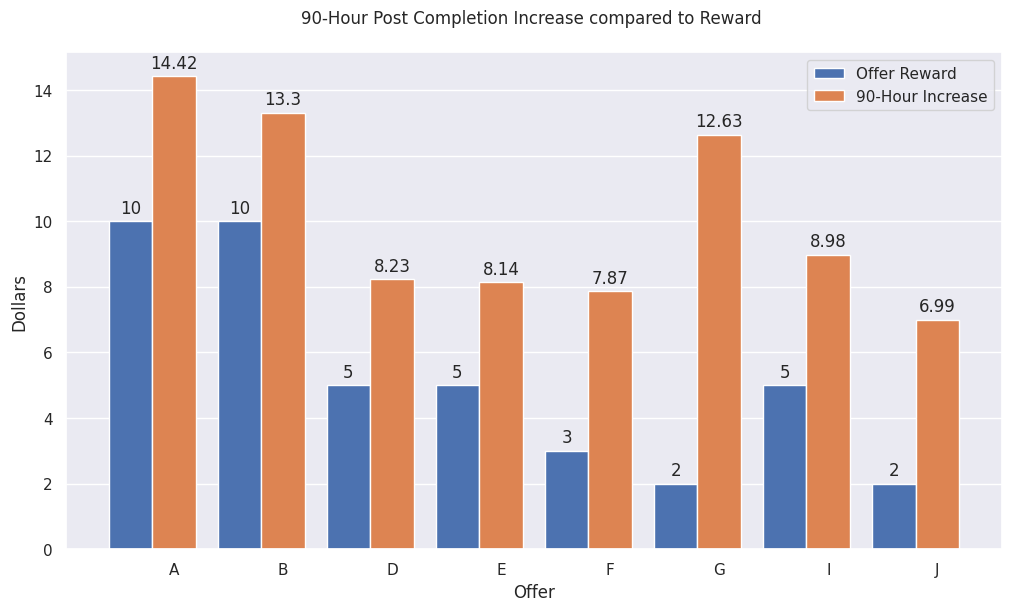

In [ ]:
df_portfolio.head(8)

# No offer completion recorded for informational offers
df_portfolio['name'] = pd.Series(['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
df_portfolio_analysis = df_portfolio[df_portfolio['offer_type'] != 'informational']
df_portfolio_analysis.head(10)


sns.set()
fig0 = plt.figure(figsize=(10,6))
sns.barplot(data=df_portfolio_analysis, x='name', y='coef', hue='offer_type', capsize=0.1)
plt.ylabel('Dollars')
plt.xlabel('Offer')
plt.legend(title='Offer Type')
plt.title('Average Increase in Total Spend \nfor 90-hours Post Offer')
plt.show()

print(' ')
#Layered plot w reward and


df_portfolio_analysis['diff'] = df_portfolio_analysis['coef'].round(decimals=2) - df_portfolio_analysis['reward']
grouped_df = df_portfolio_analysis[['name', 'reward','coef']]
grouped_df['coef'] = grouped_df['coef'].round(decimals=2)
grouped_df.set_index('name', inplace=True)

x = np.arange(len(grouped_df))
width = 0.4
multiplier = 0

fig, ax1 = plt.subplots(layout='constrained', figsize=(10,6))

for attribute, measurement in grouped_df.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

plt.grid(axis='x')
ax1.set_xlabel('Offer')
ax1.set_ylabel('Dollars')
ax1.set_xticks(x + width, grouped_df.index)
ax1.legend(['Offer Reward', '90-Hour Increase'])
ax1.set_title('90-Hour Post Completion Increase compared to Reward \n')
plt.show()


# df_profile_clean.groupby('id').sum()

# stacked_df.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10,6))



In [ ]:
df_profile_clean.head()
cols = df_profile_clean.columns[df_profile_clean.columns.str.contains('completed_')]
df_profile_clean[cols].sum()

x = df_profile_clean['completed_fafdcd668e3743c1bb461111dcafc2a4'].sum() * 3
x * 10.63

135468.72

# Business Recommendations
#### Insights
1. Multi-channel marketing results in more offers completed across age, gender, and income groups.
2. The average spend per customer increases in the 90-hours after they complete an offer.
3. The average spending increase in the 90 hours post offer is greater than the reward of the offer for all offers.

#### Data-driven recommendations
1. Starbucks should reach out to customers across all channels when making offers. This would increase the offer completion.
2. Offer "G" (id: fafdcd668e3743c1bb461111dcafc2a4) had the highest average spend increase to reward ratio. Future offers should have similar content to offer G.

#### Potential impact assessment
If Starbucks runs a caimpaign with 3 offers with a simliar design as offer "G" they could expect to reach 12,744 offers completed, pay 25,488 dollars in rewards and receive an estimated increase of 135,468 dollars of revenue in the following 90-hour. This would lead to a 110k net increase in revenue in a 90-hour period.  
